# Time of data of login activate

Logins occur most frequently at night between 9:00 pm and 3:00 am. Logins start to drop around 4:45 am to 6:30 am. It rises again at 8:30 am and peaks at 11:30 am. There is slight drop from 11:30 am to 2:00 pm. Finial, the logins raise at 7:15 pm and maxes at 10:30 pm.


# Possible  issues

Based on a quick overview of the data, there does not seem to issues with the data. There are no null values. All dates are within 1970. All hours, minutes, and seconds are within values expected for a time of day. The only possible issue is that login times are not sequential. Of the 93142 logins reported, 39341 occur before the previous login time.

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.lines as mlines
import json
import numpy as np
import pandas as pd
#import time
import datetime as dt
from datetime import datetime, timedelta,time

In [3]:
#open file
filename = 'logins.json'
with open(filename) as f:
    logins = json.load(f)
    

login_series = pd.Series(logins['login_time'])
login_series = pd.to_datetime(login_series)
login_df = pd.DataFrame(login_series,columns=['date-time'])

#number of logins each day
login_df['date'] = login_df['date-time'].apply(lambda x: x.date()) 
login_per_day = login_df.groupby(['date']).count()
login_per_day.columns = ['times per day']
#login_per_day['month/day']= login_per_day.index.map(lambda x:'{0:0>2}'.format(x.month) + '/' + '{0:0>2}'.format(x.day))

#number of logins per day
login_df['time'] = login_df['date-time'].apply(lambda x: x.time()) 
login_df['minutes of day'] = login_df['time'].apply(lambda x: x.hour*60+x.minute)


number_of_day = login_per_day['times per day'].count()
minute_count = {}
for start_time in range(0,1440,15):
    end_time = start_time + 15
    minute_bool = (login_df['minutes of day'] >= start_time) & (login_df['minutes of day'] < end_time)
    minute_count[start_time] = login_df[minute_bool]['minutes of day'].count()
Minutes_login=pd.DataFrame(data=minute_count.values(),index=minute_count.keys(),columns=['Total Logins'])
Minutes_login['Average Daily Logins'] = Minutes_login['Total Logins']/login_per_day['times per day'].count()    
Minutes_login['time'] = Minutes_login.index.map(lambda x: '{0:0>2}'.format(x//60) + ':'+'{0:0>2}'.format(x%60) )
Minutes_login['time'] = Minutes_login['time'].apply(lambda x: datetime.strptime(x, '%H:%M').time())
#login_df['time'].apply [x for x in range(0,1440,15)]



# Line Plot of the average logins over the day.

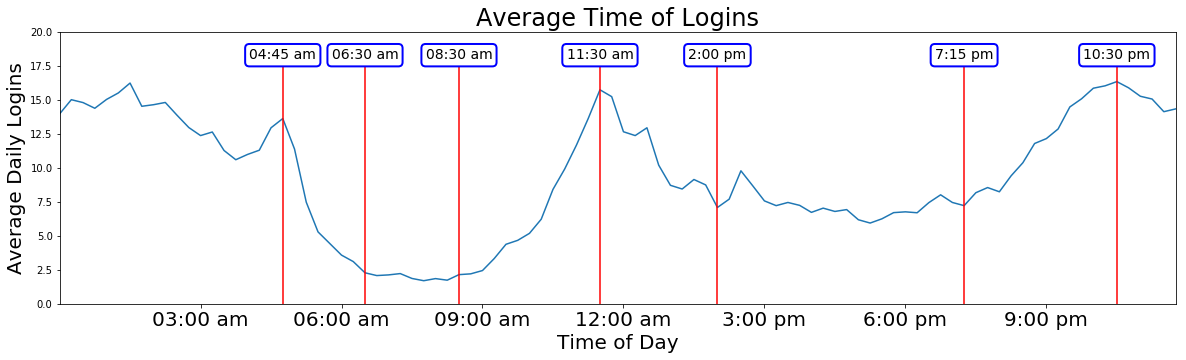

In [5]:
fig = plt.figure(figsize=(20,5))
ax = plt.gca()
sns.lineplot(x=Minutes_login['time'],y=Minutes_login['Average Daily Logins'])

box_y = 18
font_size = 14

#important times
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="b", lw=2)
ax.text(s='04:45 am',x='04:45',y=box_y,bbox=bbox_props,fontsize=font_size,horizontalalignment='center')
l = mlines.Line2D(['04:45','04:45'], [0,box_y],color='red')
ax.add_line(l)

ax.text(s='06:30 am',x='06:30',y=box_y,bbox=bbox_props,fontsize=font_size,horizontalalignment='center')
l = mlines.Line2D(['06:30','06:30'], [0,box_y],color='red')
ax.add_line(l)

ax.text(s='08:30 am',x='08:30',y=box_y,bbox=bbox_props,fontsize=font_size,horizontalalignment='center')
l = mlines.Line2D(['08:30','08:30'], [0,box_y],color='red')
ax.add_line(l)

ax.text(s='11:30 am',x='11:30',y=box_y,bbox=bbox_props,fontsize=font_size,horizontalalignment='center')
l = mlines.Line2D(['11:30','11:30'], [0,box_y],color='red')
ax.add_line(l)

ax.text(s='2:00 pm',x='14:00',y=box_y,bbox=bbox_props,fontsize=font_size,horizontalalignment='center')
l = mlines.Line2D(['14:00','14:00'], [0,box_y],color='red')
ax.add_line(l)

ax.text(s='7:15 pm',x='19:15',y=box_y,bbox=bbox_props,fontsize=font_size,horizontalalignment='center')
l = mlines.Line2D(['19:15','19:15'], [0,box_y],color='red')
ax.add_line(l)

ax.text(s='10:30 pm',x='22:30',y=box_y,bbox=bbox_props,fontsize=font_size,horizontalalignment='center')
l = mlines.Line2D(['22:30','22:30'], [0,box_y],color='red')
ax.add_line(l)

Xtime = ['03:00','06:00','09:00','12:00','15:00','18:00','21:00']
Xtime_str = ['03:00 am','06:00 am','09:00 am','12:00 am','3:00 pm','6:00 pm','9:00 pm']
plt.ylim(0,20)
plt.xlim('00:00','23:45')
plt.xticks(Xtime,Xtime_str,fontsize=20)
plt.ylabel('Average Daily Logins',fontsize=20)
plt.xlabel('Time of Day',fontsize=20)
plt.title('Average Time of Logins',fontsize=24)
plt.show()


# Total daily logins over entire period. 

Text(0.5, 1.0, 'Logins from January 1, 1970 to April 13, 1970')

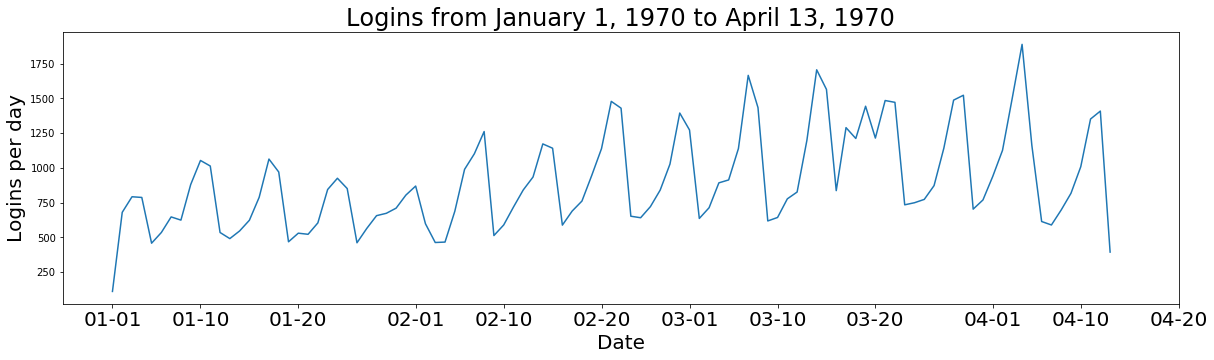

In [111]:
fig = plt.figure(figsize=(20,5))
#dates = matplotlib.dates.date2num(login_per_day.index)
#plt.plot_date(dates, login_per_day['times per day'])
sns.lineplot(x=login_per_day.index,y=login_per_day['times per day'])
Xdates_str = ['1970-01-01','1970-01-10','1970-01-20','1970-02-01','1970-02-10','1970-02-20','1970-03-01','1970-03-10','1970-03-20','1970-04-01','1970-04-10','1970-04-20']
Xdates_no_year = ['01-01','01-10','01-20','02-01','02-10','02-20','03-01','03-10','03-20','04-01','04-10','04-20']
Xdates = [datetime.strptime(d,'%Y-%m-%d').date() for d in Xdates_str]
plt.xticks(Xdates,Xdates_no_year,fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Logins per day',fontsize=20)
plt.title('Logins from January 1, 1970 to April 13, 1970',fontsize=24)

# Quality Analysis of Data

In [72]:
display(login_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 4 columns):
date-time         93142 non-null datetime64[ns]
date              93142 non-null object
time              93142 non-null object
minutes of day    93142 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.8+ MB


None

In [82]:
#are all dates in 1970?
login_df['date-time'].apply(lambda x:x.year != 1970).sum()

0

In [85]:
#are all hours in within 24?
login_df['date-time'].apply(lambda x:x.hour > 24 or x.hour < 0 ).sum()

0

In [87]:
#are all minutes in within 60?
login_df['date-time'].apply(lambda x:x.minute > 60 or x.minute < 0 ).sum()

0

In [ ]:
#are all seconds in within 60?
login_df['date-time'].apply(lambda x:x.second > 60 or x.second < 0 ).sum()

In [ ]:
#get all rows that is not chronologically based time of the entry above
chronological = pd.Series(True, index=np.arange(len(login_df.index)))
for row in range(1,len(login_df.index),1): 
    previous_row = row - 1
    chronological[row] = login_df.iloc[row]['date-time'] > login_df.iloc[previous_row]['date-time'] 

In [70]:
login_df[~chronological]['date-time']

3       1970-01-01 20:16:36
5       1970-01-01 20:21:41
6       1970-01-01 20:12:16
8       1970-01-01 20:35:38
10      1970-01-01 20:26:05
16      1970-01-01 20:34:58
19      1970-01-01 20:46:34
21      1970-01-01 20:49:12
25      1970-01-01 21:09:24
30      1970-01-01 21:51:51
33      1970-01-01 22:02:51
34      1970-01-01 21:58:32
37      1970-01-01 22:02:46
40      1970-01-01 22:01:05
42      1970-01-01 22:16:54
44      1970-01-01 22:12:05
46      1970-01-01 22:22:14
48      1970-01-01 22:24:04
49      1970-01-01 22:19:59
52      1970-01-01 22:55:56
55      1970-01-01 23:04:35
56      1970-01-01 23:04:28
58      1970-01-01 23:08:05
60      1970-01-01 23:09:31
61      1970-01-01 22:57:55
63      1970-01-01 23:09:06
64      1970-01-01 23:07:31
66      1970-01-01 22:56:25
69      1970-01-01 23:09:22
71      1970-01-01 23:07:45
                ...        
93051   1970-04-13 14:45:45
93055   1970-04-13 14:55:24
93057   1970-04-13 14:59:16
93060   1970-04-13 14:57:36
93062   1970-04-13 1